In [1]:
!pip install umap-learn
import pandas as pd
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/kaggle/input/input-trial-parametricumap/DFsEmbeddings_21_to_1374715_nomic_embed_text_v2_moe.csv")

In [4]:
X = df[list(df.columns)[2:]].values
X.shape

(600000, 768)

In [5]:
x_train = X[:int(len(X)*0.8),:]
x_val = X[int(len(X)*0.8):int(len(X)*0.9),:]
x_test = X[int(len(X)*0.9):,:]

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(480000, 768)
(60000, 768)
(60000, 768)
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 1-hidden layer

In [6]:
encoding_dim = 2
input_ = keras.Input(shape=(768,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_)
decoded = layers.Dense(768, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_, decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           1,538 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 768)                 │           2,304 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
encoder = keras.Model(input_, encoded)

# This is our encoded (2-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
               validation_data= [x_val, x_val])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0632 - val_loss: 0.0014
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
1875/1875 ━━━━━━━━

In [10]:
def loss_acc_plot(history, title=""):
    fig, ax = plt.subplots(1)
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title('Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Training', 'Validation'], loc='upper right')
    
    fig.tight_layout()
    fig.suptitle(title, x=0.5, y=1.02)
    plt.show()

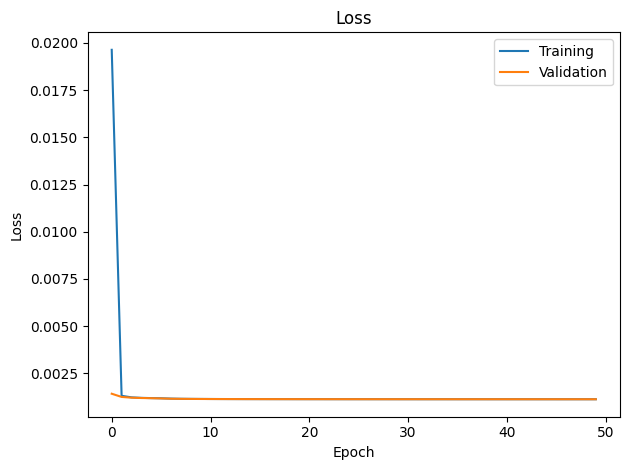

In [11]:
loss_acc_plot(autoencoder.history)

In [12]:
encoded_train = encoder.predict(x_train)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step


In [13]:
encoded_train.shape

(480000, 2)

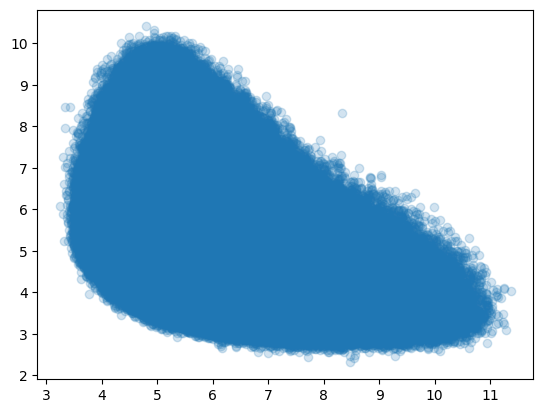

In [14]:
plt.scatter(encoded_train[:,0], encoded_train[:,1], alpha=0.2)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


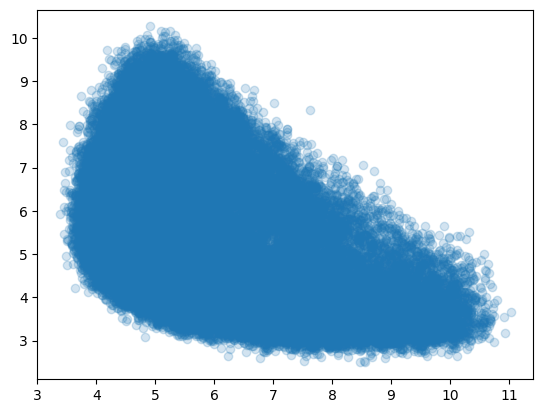

In [15]:
encoded_val = encoder.predict(x_val)
plt.scatter(encoded_val[:,0], encoded_val[:,1], alpha=0.2)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


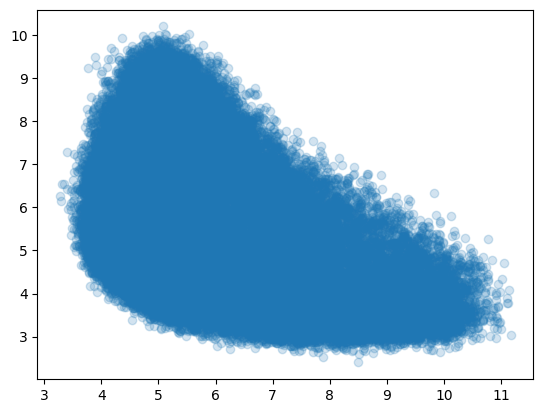

In [16]:
encoded_test = encoder.predict(x_test)
plt.scatter(encoded_test[:,0], encoded_test[:,1], alpha=0.2)

In [18]:
all_encoded_1_layer = np.concatenate((encoded_train, encoded_val, encoded_test))

In [36]:
output_df = pd.DataFrame(all_encoded_1_layer)

In [38]:
output_df[["PMID", "Title"]] = df[["PMID", "Title"]]

In [44]:
output_df.to_csv("/kaggle/working/output_autoencoder_1_hidden_37937191_to_38631939.csv", index = False)

In [46]:
import plotly.express as px
from scipy.spatial import KDTree
import plotly.io as pio
pio.renderers.default = "iframe"

In [48]:
fig = px.line(output_df, x=0, y=1, hover_data = ["Title", "PMID"])
fig.update_traces(mode="markers")
fig.show()